In [0]:
dbutils.fs.rm("/FileStore/tables/Million_sellers-2.xlsx")

Out[49]: False

In [0]:
file_loc='/FileStore/tables/'
file_type="csv"

customer_data=file_loc+'customers.csv'
department_data=file_loc+'departments.csv'
categories_data=file_loc+'categories.csv'
product_data=file_loc+'products1.csv'
order_data=file_loc+'orders.csv'
order_items_data=file_loc+'order_items.csv'


In [0]:
#CSV options
first_row_is_header="True"
delimiter=","

In [0]:
#Reading the customer dataset
from pyspark.sql.types import *
from pyspark.sql.functions import * 

customers_schema=StructType([
    StructField('customer_id',IntegerType(),nullable=True),
    StructField('customer_fname',StringType(),nullable=True),
    StructField('customer_lname',    StringType(), nullable=True),
    StructField('customer_email',    StringType(), nullable=True),
    StructField('customer_password', StringType(), nullable=True),
    StructField('customer_street',   StringType(), nullable=True),
    StructField('customer_city',     StringType(), nullable=True),
    StructField('customer_state',    StringType(), nullable=True),
    StructField('customer_zipcode',  StringType(), nullable=True)
])


#create a dataframe using the above details
customer_df=spark.read.format(file_type)\
.option("sep",delimiter)\
.option("header",first_row_is_header)\
.schema(customers_schema)\
.load(customer_data)

display(customer_df)

customer_id customer_fname customer_lname customer_email customer_password customer_street customer_city customer_state customer_zipcode 2 Mary Barrett XXXXXXXXX XXXXXXXXX 9526 Noble Embers Ridge Littleton CO 80126 3 Ann Smith XXXXXXXXX XXXXXXXXX 3422 Blue Pioneer Bend Caguas PR 00725 4 Mary Jones XXXXXXXXX XXXXXXXXX 8324 Little Common San Marcos CA 92069 5 Robert Hudson XXXXXXXXX XXXXXXXXX 10 Crystal River Mall Caguas PR 00725 6 Mary Smith XXXXXXXXX XXXXXXXXX 3151 Sleepy Quail Promenade Passaic NJ 07055 7 Melissa Wilcox XXXXXXXXX XXXXXXXXX 9453 High Concession Caguas PR 00725 8 Megan Smith XXXXXXXXX XXXXXXXXX 3047 Foggy Forest Plaza Lawrence MA 01841 9 Mary Perez XXXXXXXXX XXXXXXXXX 3616 Quaking Street Caguas PR 00725 10 Melissa Smith XXXXXXXXX XXXXXXXXX 8598 Harvest Beacon Plaza Stafford VA 22554 11 Mary Huffman XXXXXXXXX XXXXXXXXX 3169 Stony Woods Caguas PR 00725 12 Christopher Smith XXXXXXXXX XXXXXXXXX 5594 Jagged Embers By-pass San Antonio TX 78227 13 Mary Baldwin XXXXXXXXX XXXXXXXXX 7922 Iron Oak Gardens Caguas PR 00725 14 Katherine Smith XXXXXXXXX XXXXXXXXX 5666 Hazy Pony Square Pico Rivera CA 90660 15 Jane Luna XXXXXXXXX XXXXXXXXX 673 Burning Glen Fontana CA 92336 16 Tiffany Smith XXXXXXXXX XXXXXXXXX 6651 Iron Port Caguas PR 00725 17 Mary Robinson XXXXXXXXX XXXXXXXXX 1325 Noble Pike Taylor MI 48180 18 Robert Smith XXXXXXXXX XXXXXXXXX 2734 Hazy Butterfly Circle Martinez CA 94553 19 Stephanie Mitchell XXXXXXXXX XXXXXXXXX 3543 Red Treasure Bay Caguas PR 00725 20 Mary Ellis XXXXXXXXX XXXXXXXXX 4703 Old Route West New York NJ 07093 21 William Zimmerman XXXXXXXXX XXXXXXXXX 3323 Old Willow Mall Caguas PR 00725 22 Joseph Smith XXXXXXXXX XXXXXXXXX 7740 Broad Fox Villas North Bergen NJ 07047 23 Benjamin Duarte XXXXXXXXX XXXXXXXXX 8811 High Horse Impasse San Juan PR 00921 24 Mary Smith XXXXXXXXX XXXXXXXXX 9417 Emerald Towers Caguas PR 00725 25 Paul Richardson XXXXXXXXX XXXXXXXXX 318 Merry Creek Mountain Peoria AZ 85345 26 Johnny Hood XXXXXXXXX XXXXXXXXX 9576 Middle Hills Round Glenview IL 60025 27 Mary Vincent XXXXXXXXX XXXXXXXXX 1768 Sleepy Zephyr Place Caguas PR 00725 28 Timothy Smith XXXXXXXXX XXXXXXXXX 9366 Colonial Horse Close Longview WA 98632 29 Mary Humphrey XXXXXXXXX XXXXXXXXX 2469 Blue Brook Crossing Fort Worth TX 76133 30 Barbara Smith XXXXXXXXX XXXXXXXXX 2455 Merry Hollow Caguas PR 00725 31 Mary Byrd XXXXXXXXX XXXXXXXXX 8259 Foggy Edge Albuquerque NM 87111 32 Alice Smith XXXXXXXXX XXXXXXXXX 2082 Hidden Green Caguas PR 00725 33 Adam Petersen XXXXXXXXX XXXXXXXXX 9768 Noble Horse Heights Norfolk VA 23503 34 Mary Smith XXXXXXXXX XXXXXXXXX 3330 Easy Berry Range Caguas PR 00725 35 Margaret Wright XXXXXXXXX XXXXXXXXX 9456 Sleepy Jetty Oceanside CA 92056 36 Michelle Carey XXXXXXXXX XXXXXXXXX 6336 Fallen Village Caguas PR 00725 37 Virginia Conrad XXXXXXXXX XXXXXXXXX 6115 Indian Beacon Close Norfolk VA 23503 38 Mary Smith XXXXXXXXX XXXXXXXXX 2805 Crystal Moor Opelousas LA 70570 39 Juan Mckinney XXXXXXXXX XXXXXXXXX 7274 Blue Wagon Villas Caguas PR 00725 40 Mary Smith XXXXXXXXX XXXXXXXXX 7358 Rocky Villas Long Beach CA 90805 41 Victoria Mason XXXXXXXXX XXXXXXXXX 7869 Crystal View Villas Brooklyn NY 11230 42 Ethan Smith XXXXXXXXX XXXXXXXXX 7533 Thunder Wagon Beach Duluth GA 30096 43 Mary Herring XXXXXXXXX XXXXXXXXX 4575 Thunder Dale Caguas PR 00725 44 Howard Smith XXXXXXXXX XXXXXXXXX 1356 Easy Plaza Napa CA 94558 45 Mary Nunez XXXXXXXXX XXXXXXXXX 1229 Bright Robin Corners Denver CO 80231 46 Jennifer Smith XXXXXXXXX XXXXXXXXX 5463 Rocky Autoroute Freeport NY 11520 47 Lori Fuller XXXXXXXXX XXXXXXXXX 357 Noble Lane Caguas PR 00725 48 Mary Cowan XXXXXXXXX XXXXXXXXX 1040 Hazy Timber Lookout Strongsville OH 44136 49 Martha Smith XXXXXXXXX XXXXXXXXX 7449 Merry Chase Caguas PR 00725 50 Mary Kim XXXXXXXXX XXXXXXXXX 938 Rustic Pine Ridge San Bernardino CA 92410 51 Jessica Smith XXXXXXXXX XXXXXXXXX 8344 Dewy Fawn Farms Caguas PR 00725 52 Mary Lawson XXXXXXXXX XXXXXXXXX 65 Silent Inlet Chicago IL 60622 53 Katherine Smith XXXXXXXXX XXXXXXXXX 9

In [0]:
# define schema for products dataset
products_schema = StructType([
    StructField('product_id',          IntegerType(), nullable=True),
    StructField('product_category_id', IntegerType(), nullable=True),
    StructField('product_name',        StringType(), nullable=True),
    StructField('product_description', StringType(), nullable=True),
    StructField('product_price',       FloatType(), nullable=True),
    StructField('product_image',       StringType(), nullable=True)])

# create the dataframe
products_df = spark.read.format(file_type)\
.option("sep", delimiter)\
.option("header", first_row_is_header)\
.schema(products_schema)\
.load(product_data)

display(products_df)

product_id product_category_id product_name product_description product_price product_image 2 2 Under Armour Men's Highlight MC Football Clea null 129.99 http://images.acmesports.sports/Under+Armour+Men%27s+Highlight+MC+Football+Cleat 3 2 Under Armour Men's Renegade D Mid Football Cl null 89.99 http://images.acmesports.sports/Under+Armour+Men%27s+Renegade+D+Mid+Football+Cleat 4 2 Under Armour Men's Renegade D Mid Football Cl null 89.99 http://images.acmesports.sports/Under+Armour+Men%27s+Renegade+D+Mid+Football+Cleat 5 2 Riddell Youth Revolution Speed Custom Footbal null 199.99 http://images.acmesports.sports/Riddell+Youth+Revolution+Speed+Custom+Football+Helmet 6 2 Jordan Men's VI Retro TD Football Cleat null 134.99 http://images.acmesports.sports/Jordan+Men%27s+VI+Retro+TD+Football+Cleat 7 2 Schutt Youth Recruit Hybrid Custom Football H null 99.99 http://images.acmesports.sports/Schutt+Youth+Recruit+Hybrid+Custom+Football+Helmet+2014 8 2 Nike Men's Vapor Carbon Elite TD Football Cle null 129.99 http://images.acmesports.sports/Nike+Men%27s+Vapor+Carbon+Elite+TD+Football+Cleat 9 2 Nike Adult Vapor Jet 3.0 Receiver Gloves null 50.0 http://images.acmesports.sports/Nike+Adult+Vapor+Jet+3.0+Receiver+Gloves 10 2 Under Armour Men's Highlight MC Football Clea null 129.99 http://images.acmesports.sports/Under+Armour+Men%27s+Highlight+MC+Football+Cleat 11 2 Fitness Gear 300 lb Olympic Weight Set null 209.99 http://images.acmesports.sports/Fitness+Gear+300+lb+Olympic+Weight+Set 12 2 Under Armour Men's Highlight MC Alter Ego Fla null 139.99 http://images.acmesports.sports/Under+Armour+Men%27s+Highlight+MC+Alter+Ego+Flash+Football... 13 2 Under Armour Men's Renegade D Mid Football Cl null 89.99 http://images.acmesports.sports/Under+Armour+Men%27s+Renegade+D+Mid+Football+Cleat 14 2 Quik Shade Summit SX170 10 FT. x 10 FT. Canop null 199.99 http://images.acmesports.sports/Quik+Shade+Summit+SX170+10+FT.+x+10+FT.+Canopy 15 2 Under Armour Kids' Highlight RM Alter Ego Sup null 59.99 http://images.acmesports.sports/Under+Armour+Kids%27+Highlight+RM+Alter+Ego+Superman+Football... 16 2 Riddell Youth 360 Custom Football Helmet null 299.99 http://images.acmesports.sports/Riddell+Youth+360+Custom+Football+Helmet 17 2 Under Armour Men's Highlight MC Football Clea null 129.99 http://images.acmesports.sports/Under+Armour+Men%27s+Highlight+MC+Football+Cleat 18 2 Reebok Men's Full Zip Training Jacket null 29.97 http://images.acmesports.sports/Reebok+Men%27s+Full+Zip+Training+Jacket 19 2 Nike Men's Fingertrap Max Training Shoe null 124.99 http://images.acmesports.sports/Nike+Men%27s+Fingertrap+Max+Training+Shoe 20 2 Under Armour Men's Highlight MC Football Clea null 129.99 http://images.acmesports.sports/Under+Armour+Men%27s+Highlight+MC+Football+Cleat 21 2 Under Armour Kids' Highlight RM Football Clea null 54.99 http://images.acmesports.sports/Under+Armour+Kids%27+Highlight+RM+Football+Cleat 22 2 Kijaro Dual Lock Chair null 29.99 http://images.acmesports.sports/Kijaro+Dual+Lock+Chair 23 2 Under Armour Men's Highlight MC Alter Ego Hul null 139.99 http://images.acmesports.sports/Under+Armour+Men%27s+Highlight+MC+Alter+Ego+Hulk+Football... 24 2 Elevation Training Mask 2.0 null 79.99 http://images.acmesports.sports/Elevation+Training+Mask+2.0 25 3 Quest Q64 10 FT. x 10 FT. Slant Leg Instant U null 59.98 http://images.acmesports.sports/Quest+Q64+10+FT.+x+10+FT.+Slant+Leg+Instant+Up+Canopy 26 3 Nike Men's USA White Home Stadium Soccer Jers null 90.0 http://images.acmesports.sports/Nike+Men%27s+USA+White+Home+Stadium+Soccer+Jersey 27 3 Nike Youth USA Away Stadium Replica Soccer Je null 75.0 http://images.acmesports.sports/Nike+Youth+USA+Away+Stadium+Replica+Soccer+Jersey 28 3 adidas Brazuca 2014 Top Glider Soccer Ball null 29.99 http://images.acmesports.sports/adidas+Brazuca+2014+Top+Glider+Soccer+Ball 29 3 Nike Men's USA Away Stadium Replica Soccer Je null 90.0 http://images.acmesports.sports/Nike+Men%27s+USA+Away+Stadium+Replica+Soccer+Jersey 30 3 adidas Men's 

In [0]:
#define schema for categories

categories_schema=StructType([
    StructField('category_id',IntegerType(),nullable=True),
    StructField('category_department_id',IntegerType(),nullable=True),
    StructField('category_name',StringType(),nullable=True)
])


#create the dataframe
categories_df=spark.read.format(file_type)\
.option("sep",delimiter)\
.option("header",first_row_is_header)\
.schema(categories_schema)\
.load(categories_data)

display(categories_df)

category_id category_department_id category_name 2 2 Soccer 3 2 Baseball & Softball 4 2 Basketball 5 2 Lacrosse 6 2 Tennis & Racquet 7 2 Hockey 8 2 More Sports 9 3 Cardio Equipment 10 3 Strength Training 11 3 Fitness Accessories 12 3 Boxing & MMA 13 3 Electronics 14 3 Yoga & Pilates 15 3 Training by Sport 16 3 As Seen on TV! 17 4 Cleats 18 4 Men's Footwear 19 4 Women's Footwear 20 4 Kids' Footwear 21 4 Featured Shops 22 4 Accessories 23 5 Men's Apparel 24 5 Women's Apparel 25 5 Boys' Apparel 26 5 Girls' Apparel 27 5 Accessories 28 5 Top Brands 29 5 Shop By Sport 30 6 Men's Golf Clubs 31 6 Women's Golf Clubs 32 6 Golf Apparel 33 6 Golf Shoes 34 6 Golf Bags & Carts 35 6 Golf Gloves 36 6 Golf Balls 37 6 Electronics 38 6 Kids' Golf Clubs 39 6 Team Shop 40 6 Accessories 41 6 Trade-In 42 7 Bike & Skate Shop 43 7 Camping & Hiking 44 7 Hunting & Shooting 45 7 Fishing 46 7 Indoor/Outdoor Games 47 7 Boating 48 7 Water Sports 49 8 MLB 50 8 NFL 51 8 NHL 52 8 NBA 53 8 NCAA 54 8 MLS 55 8 International Soccer 56 8 World Cup Shop 57 8 MLB Players 58 8 NFL Players

In [0]:
# define the schema for orders
orders_schema = StructType([
    StructField('order_id',          IntegerType(), nullable=True),
    StructField('order_date',        StringType(), nullable=True),
    StructField('order_customer_id', IntegerType(), nullable=True),
    StructField('order_status',      StringType(), nullable=True)])
# create the dataframe
orders_df = spark.read.format(file_type)\
.option("sep", delimiter)\
.option("header", first_row_is_header)\
.schema(orders_schema)\
.load(order_data)

display(orders_df)

order_id order_date order_customer_id order_status 2 2013-07-25 00:00:00.0 256 PENDING_PAYMENT 3 2013-07-25 00:00:00.0 12111 COMPLETE 4 2013-07-25 00:00:00.0 8827 CLOSED 5 2013-07-25 00:00:00.0 11318 COMPLETE 6 2013-07-25 00:00:00.0 7130 COMPLETE 7 2013-07-25 00:00:00.0 4530 COMPLETE 8 2013-07-25 00:00:00.0 2911 PROCESSING 9 2013-07-25 00:00:00.0 5657 PENDING_PAYMENT 10 2013-07-25 00:00:00.0 5648 PENDING_PAYMENT 11 2013-07-25 00:00:00.0 918 PAYMENT_REVIEW 12 2013-07-25 00:00:00.0 1837 CLOSED 13 2013-07-25 00:00:00.0 9149 PENDING_PAYMENT 14 2013-07-25 00:00:00.0 9842 PROCESSING 15 2013-07-25 00:00:00.0 2568 COMPLETE 16 2013-07-25 00:00:00.0 7276 PENDING_PAYMENT 17 2013-07-25 00:00:00.0 2667 COMPLETE 18 2013-07-25 00:00:00.0 1205 CLOSED 19 2013-07-25 00:00:00.0 9488 PENDING_PAYMENT 20 2013-07-25 00:00:00.0 9198 PROCESSING 21 2013-07-25 00:00:00.0 2711 PENDING 22 2013-07-25 00:00:00.0 333 COMPLETE 23 2013-07-25 00:00:00.0 4367 PENDING_PAYMENT 24 2013-07-25 00:00:00.0 11441 CLOSED 25 2013-07-25 00:00:00.0 9503 CLOSED 26 2013-07-25 00:00:00.0 7562 COMPLETE 27 2013-07-25 00:00:00.0 3241 PENDING_PAYMENT 28 2013-07-25 00:00:00.0 656 COMPLETE 29 2013-07-25 00:00:00.0 196 PROCESSING 30 2013-07-25 00:00:00.0 10039 PENDING_PAYMENT 31 2013-07-25 00:00:00.0 6983 PAYMENT_REVIEW 32 2013-07-25 00:00:00.0 3960 COMPLETE 33 2013-07-25 00:00:00.0 5793 PENDING_PAYMENT 34 2013-07-25 00:00:00.0 4189 PROCESSING 35 2013-07-25 00:00:00.0 4840 COMPLETE 36 2013-07-25 00:00:00.0 5649 PENDING 37 2013-07-25 00:00:00.0 5863 CLOSED 38 2013-07-25 00:00:00.0 11586 PROCESSING 39 2013-07-25 00:00:00.0 8214 PENDING 40 2013-07-25 00:00:00.0 12092 PENDING_PAYMENT 41 2013-07-25 00:00:00.0 8136 PENDING_PAYMENT 42 2013-07-25 00:00:00.0 9776 PENDING 43 2013-07-25 00:00:00.0 7776 PENDING_PAYMENT 44 2013-07-25 00:00:00.0 10500 PENDING 45 2013-07-25 00:00:00.0 2636 COMPLETE 46 2013-07-25 00:00:00.0 1549 ON_HOLD 47 2013-07-25 00:00:00.0 8487 PENDING_PAYMENT 48 2013-07-25 00:00:00.0 12186 PROCESSING 49 2013-07-25 00:00:00.0 1871 PENDING 50 2013-07-25 00:00:00.0 5225 CANCELED 51 2013-07-25 00:00:00.0 12271 CLOSED 52 2013-07-25 00:00:00.0 5126 PENDING_PAYMENT 53 2013-07-25 00:00:00.0 4701 PROCESSING 54 2013-07-25 00:00:00.0 10628 PENDING_PAYMENT 55 2013-07-25 00:00:00.0 2052 PENDING 56 2013-07-25 00:00:00.0 10519 COMPLETE 57 2013-07-25 00:00:00.0 7073 CLOSED 58 2013-07-25 00:00:00.0 9213 PENDING_PAYMENT 59 2013-07-25 00:00:00.0 11644 PENDING_PAYMENT 60 2013-07-25 00:00:00.0 8365 PENDING_PAYMENT 61 2013-07-25 00:00:00.0 4791 CLOSED 62 2013-07-25 00:00:00.0 9111 CLOSED 63 2013-07-25 00:00:00.0 1148 COMPLETE 64 2013-07-25 00:00:00.0 5579 PENDING_PAYMENT 65 2013-07-25 00:00:00.0 5903 COMPLETE 66 2013-07-25 00:00:00.0 1792 ON_HOLD 67 2013-07-25 00:00:00.0 1406 COMPLETE 68 2013-07-25 00:00:00.0 4320 PENDING 69 2013-07-25 00:00:00.0 2821 SUSPECTED_FRAUD 70 2013-07-25 00:00:00.0 11809 PENDING_PAYMENT 71 2013-07-25 00:00:00.0 8646 COMPLETE 72 2013-07-25 00:00:00.0 4349 COMPLETE 73 2013-07-25 00:00:00.0 8504 PENDING_PAYMENT 74 2013-07-25 00:00:00.0 662 PENDING_PAYMENT 75 2013-07-25 00:00:00.0 2505 PENDING_PAYMENT 76 2013-07-25 00:00:00.0 6898 COMPLETE 77 2013-07-25 00:00:00.0 7915 PENDING_PAYMENT 78 2013-07-25 00:00:00.0 8619 PAYMENT_REVIEW 79 2013-07-25 00:00:00.0 7327 PENDING_PAYMENT 80 2013-07-25 00:00:00.0 3007 COMPLETE 81 2013-07-25 00:00:00.0 674 PROCESSING 82 2013-07-25 00:00:00.0 3566 PENDING_PAYMENT 83 2013-07-25 00:00:00.0 1265 COMPLETE 84 2013-07-25 00:00:00.0 6789 PROCESSING 85 2013-07-25 00:00:00.0 1485 PENDING 86 2013-07-25 00:00:00.0 6680 PENDING_PAYMENT 87 2013-07-25 00:00:00.0 3065 CLOSED 88 2013-07-25 00:00:00.0 3809 COMPLETE 89 2013-07-25 00:00:00.0 824 ON_HOLD 90 2013-07-25 00:00:00.0 9131 CLOSED 91 2013-07-25 00:00:00.0 8912 COMPLETE 92 2013-07-25 00:00:00.0 6932 COMPLETE 93 2013-07-25 00:00:00.0 2256 PENDING_PAYMENT 94 2013-07-25 00:00:00.0 11589 PROCESSING 95 2013-07-25 00:00:00.0 9032 COMPLETE 96 2013-07-25 00:00:00.0 8683 PENDING 97 2013-07-25 00:00:00.0 10784 PE

In [0]:
#define schema for department
departments_schema = StructType([
    StructField('department_id',   IntegerType(), nullable=True),
    StructField('department_name', StringType(), nullable=True)])

# create the dataframe
departments_df = spark.read.format(file_type)\
.option("sep", delimiter)\
.option("header", first_row_is_header)\
.schema(departments_schema)\
.load(department_data)

display(departments_df)


department_id department_name 3 Footwear 4 Apparel 5 Golf 6 Outdoors 7 Fan Shop

In [0]:
# define the schema for order items
order_items_schema = StructType([
    StructField('order_item_id',            IntegerType(), nullable=True),
    StructField('order_item_order_id',      IntegerType(), nullable=True),
    StructField('order_item_product_id',    IntegerType(), nullable=True),
    StructField('order_item_quantity',      IntegerType(), nullable=True),
    StructField('order_item_subtotal',      FloatType(), nullable=True),
    StructField('order_item_product_price', FloatType(), nullable=True)])


# create the dataframe
order_items_df = spark.read.format(file_type)\
.option("sep", delimiter)\
.option("header", first_row_is_header)\
.schema(order_items_schema)\
.load(order_items_data)

display(order_items_df)

order_item_id order_item_order_id order_item_product_id order_item_quantity order_item_subtotal order_item_product_price 2 2 1073 1 199.99 199.99 3 2 502 5 250.0 50.0 4 2 403 1 129.99 129.99 5 4 897 2 49.98 24.99 6 4 365 5 299.95 59.99 7 4 502 3 150.0 50.0 8 4 1014 4 199.92 49.98 9 5 957 1 299.98 299.98 10 5 365 5 299.95 59.99 11 5 1014 2 99.96 49.98 12 5 957 1 299.98 299.98 13 5 403 1 129.99 129.99 14 7 1073 1 199.99 199.99 15 7 957 1 299.98 299.98 16 7 926 5 79.95 15.99 17 8 365 3 179.97 59.99 18 8 365 5 299.95 59.99 19 8 1014 4 199.92 49.98 20 8 502 1 50.0 50.0 21 9 191 2 199.98 99.99 22 9 1073 1 199.99 199.99 23 9 1073 1 199.99 199.99 24 10 1073 1 199.99 199.99 25 10 1014 2 99.96 49.98 26 10 403 1 129.99 129.99 27 10 917 1 21.99 21.99 28 10 1073 1 199.99 199.99 29 11 365 1 59.99 59.99 30 11 627 4 159.96 39.99 31 11 1014 1 49.98 49.98 32 11 191 4 399.96 99.99 33 11 1014 5 249.9 49.98 34 12 957 1 299.98 299.98 35 12 134 4 100.0 25.0 36 12 1014 3 149.94 49.98 37 12 191 5 499.95 99.99 38 12 502 5 250.0 50.0 39 13 276 4 127.96 31.99 40 14 1004 1 399.98 399.98 41 14 1014 2 99.96 49.98 42 14 502 1 50.0 50.0 43 15 502 1 50.0 50.0 44 15 1073 1 199.99 199.99 45 15 828 3 95.97 31.99 46 15 365 3 179.97 59.99 47 15 1004 1 399.98 399.98 48 16 365 2 119.98 59.99 49 16 365 5 299.95 59.99 50 17 810 4 79.96 19.99 51 17 1014 2 99.96 49.98 52 17 93 3 74.97 24.99 53 17 1073 1 199.99 199.99 54 17 365 4 239.96 59.99 55 18 1073 1 199.99 199.99 56 18 365 2 119.98 59.99 57 18 403 1 129.99 129.99 58 19 1004 1 399.98 399.98 59 19 957 1 299.98 299.98 60 20 502 5 250.0 50.0 61 20 1014 4 199.92 49.98 62 20 403 1 129.99 129.99 63 20 365 5 299.95 59.99 64 21 897 3 74.97 24.99 65 21 276 4 127.96 31.99 66 21 37 2 69.98 34.99 67 21 502 2 100.0 50.0 68 23 957 1 299.98 299.98 69 24 403 1 129.99 129.99 70 24 502 1 50.0 50.0 71 24 502 5 250.0 50.0 72 24 1073 1 199.99 199.99 73 24 1073 1 199.99 199.99 74 25 1004 1 399.98 399.98 75 27 502 3 150.0 50.0 76 27 1073 1 199.99 199.99 77 27 1004 1 399.98 399.98 78 28 191 4 399.96 99.99 79 28 957 1 299.98 299.98 80 28 957 1 299.98 299.98 81 28 191 1 99.99 99.99 82 28 365 1 59.99 59.99 83 29 1073 1 199.99 199.99 84 29 1014 5 249.9 49.98 85 29 403 1 129.99 129.99 86 29 403 1 129.99 129.99 87 29 1004 1 399.98 399.98 88 30 502 2 100.0 50.0 89 31 191 5 499.95 99.99 90 33 403 1 129.99 129.99 91 33 1073 1 199.99 199.99 92 33 403 1 129.99 129.99 93 33 1014 4 199.92 49.98 94 34 957 1 299.98 299.98 95 35 403 1 129.99 129.99 96 36 502 2 100.0 50.0 97 36 957 1 299.98 299.98 98 36 1004 1 399.98 399.98 99 37 365 1 59.99 59.99 100 37 906 4 99.96 24.99 101 38 627 4 159.96 39.99 102 38 502 4 200.0 50.0 103 39 1073 1 199.99 199.99 104 41 1014 4 199.92 49.98 105 41 825 4 127.96 31.99 106 42 627 1 39.99 39.99 107 42 365 5 299.95 59.99 108 42 1004 1 399.98 399.98 109 43 957 1 299.98 299.98 110 43 191 1 99.99 99.99 111 43 403 1 129.99 129.99 112 44 1004 1 399.98 399.98 113 45 627 5 199.95 39.99 114 45 627 4 159.96 39.99 115 45 924 5 79.95 15.99 116 45 365 1 59.99 59.99 117 46 403 1 129.99 129.99 118 46 1014 2 99.96 49.98 119 48 1014 1 49.98 49.98 120 48 886 2 49.98 24.99 121 49 957 1 299.98 299.98 122 49 365 2 119.98 59.99 123 49 403 1 129.99 129.99 124 50 403 1 129.99 129.99 125 50 957 1 299.98 299.98 126 51 502 1 50.0 50.0 127 51 1004 1 399.98 399.98 128 52 1014 5 249.9 49.98 129 52 1014 3 149.94 49.98 130 56 1073 1 199.99 199.99 131 56 1014 4 199.92 49.98 132 56 957 1 299.98 299.98 133 57 365 3 179.97 59.99 134 57 365 2 119.98 59.99 135 57 403 1 129.99 129.99 136 57 821 4 207.96 51.99 137 58 775 2 19.98 9.99 138 58 502 1 50.0 50.0 139 58 1004 1 399.98 399.98 140 58 1073 1 199.99 199.99 141 58 403 1 129.99 129.99 142 59 957 1 299.98 299.98 143 59 365 1 59.99 59.99 144 59 365 1 59.99 59.99 145 59 1073 1 199.99 199.99 146 61 365 2 119.98 59.99 147 61 365 2 119.98 59.99 148 61 191 4 399.96 99.99 149 62 1004 1 399.98 399.98 150 62 1004 1 399.98 399.98 151 62 957 1 299.98 299.98 152 62 502 1 50.0 50.0 153 63 1004 1 399.98 399.98 154 63 1014 2 99.

In [0]:
#code
orders_df.count()

Out[69]: 68882

In [0]:
avg_revenue=orders_df.join(order_items_df,col("order_id")==col("order_item_order_id")).select("order_item_subtotal","order_item_order_id").select((sum("order_item_subtotal")/countDistinct('order_item_order_id')).alias('avg_rev_per_order'))


avg_revenue.show()


+-----------------+
|avg_rev_per_order|
+-----------------+
|597.6374824728177|
+-----------------+



In [0]:
avg_rev_per_day=orders_df.join(order_items_df,col("order_id")==col("order_item_order_id")).select('order_date','order_item_subtotal','order_item_order_id')\
.groupBy('order_date')\
.agg((sum('order_item_subtotal')/countDistinct('order_item_order_id')).alias('avg_rev_per_day'))\
.orderBy('order_date')

avg_rev_per_day.show(10)

+--------------------+-----------------+
|          order_date|  avg_rev_per_day|
+--------------------+-----------------+
|2013-07-25 00:00:...|590.0334897082785|
|2013-07-26 00:00:...|585.9234878147109|
|2013-07-27 00:00:...|577.5676682063512|
|2013-07-28 00:00:...|551.4119109020958|
|2013-07-29 00:00:...|635.5883909684641|
|2013-07-30 00:00:...|564.5363838698838|
|2013-07-31 00:00:...|630.9955146643533|
|2013-08-01 00:00:...|608.4982189502356|
|2013-08-02 00:00:...|587.8871075517388|
|2013-08-03 00:00:...|599.1628419048382|
+--------------------+-----------------+
only showing top 10 rows



In [0]:
avg_revenue_per_month=orders_df.join(order_items_df,col("order_id")==col("order_item_order_id"))\
.select('order_date','order_item_subtotal','order_item_order_id')\
.withColumn("date",to_date(col("order_date").cast("timestamp")))\
.withColumn("month",month(col("date")))\
.withColumn("year",year(col("date")))\
.groupBy('month','year')\
.agg(avg('order_item_subtotal').alias('avg_rev_per_month'))\
.orderBy('month')

avg_revenue_per_month.show()

+-----+----+------------------+
|month|year| avg_rev_per_month|
+-----+----+------------------+
|    1|2014| 199.4031819907084|
|    2|2014|197.99513431082633|
|    3|2014| 199.4768129569396|
|    4|2014|197.84314083932082|
|    5|2014|200.16564445417947|
|    6|2014|203.19154387871515|
|    7|2013|200.12623683619873|
|    7|2014|198.73016375184736|
|    8|2013|198.25194523225554|
|    9|2013|199.70922326100543|
|   10|2013|198.59266499428136|
|   11|2013| 199.2238976529843|
|   12|2013| 199.1285441948526|
+-----+----+------------------+



In [0]:
top_perform_dept=orders_df.filter((col("order_status")!='CANCELED')&(col("order_status")!='SUSPECTED_FRAUD'))\
.join(order_items_df,col("order_id")==col("order_item_order_id"),how='inner')\
.join(products_df,col("order_item_product_id")==col("product_id"),how='inner')\
.join(categories_df,col('product_category_id')==col('category_id'),how='inner')\
.join(departments_df, col("category_department_id") == col("department_id"), how='inner')\
.select('department_name',year(col("order_date")).alias('order_year'),'order_item_subtotal')\
.groupBy(col('department_name'),'order_year')\
.agg(sum(col("order_item_subtotal")).alias('total_revenue'))\
.orderBy('department_name','order_year')

top_perform_dept.show()

+---------------+----------+------------------+
|department_name|order_year|     total_revenue|
+---------------+----------+------------------+
|        Apparel|      2013|3090985.6535224915|
|        Apparel|      2014| 3917585.841217041|
|       Fan Shop|      2013| 7290531.899988174|
|       Fan Shop|      2014|  9095735.77280426|
|       Footwear|      2013|1711492.5186824799|
|       Footwear|      2014| 2122339.649032593|
|           Golf|      2013| 1967396.959728241|
|           Golf|      2014|2440585.2815055847|
|       Outdoors|      2013| 420317.9507675171|
|       Outdoors|      2014| 532437.6709976196|
+---------------+----------+------------------+



In [0]:
max_pt=products_df.select(max('product_price')).collect()[0][0]

most_expns_product_df=products_df.select('product_id','product_category_id','product_name','product_price').filter(col('product_price')==max_pt)
                                         
most_expns_product_df.show()

+----------+-------------------+-------------------+-------------+
|product_id|product_category_id|       product_name|product_price|
+----------+-------------------+-------------------+-------------+
|       208|                 10|SOLE E35 Elliptical|      1999.99|
+----------+-------------------+-------------------+-------------+



In [0]:
# solution
highest_grossing_item = order_items_df.select('order_item_product_id', 'order_item_subtotal')\
     .groupBy('order_item_product_id')\
     .agg(sum('order_item_subtotal').alias('product_revenue'))\
     .orderBy('product_revenue', ascending=False)\
     .limit(1)\
     .join(products_df, col("order_item_product_id") == col("product_id"), how='inner')\
     .select('product_id', 'product_category_id', 'product_name', 'product_revenue')\
     .show(truncate=False)

+----------+-------------------+-----------------------------------------+-----------------+
|product_id|product_category_id|product_name                             |product_revenue  |
+----------+-------------------+-----------------------------------------+-----------------+
|1004      |45                 |Field & Stream Sportsman 16 Gun Fire Safe|6929653.690338135|
+----------+-------------------+-----------------------------------------+-----------------+



In [0]:
popular_category_df = order_items_df.join(products_df, 
                                 col("order_item_product_id") ==  col("product_id"), how='inner')\
                .join(categories_df, col("category_id") == col("product_category_id"), how='inner')\
                .groupBy('category_name')\
                .agg(sum('order_item_quantity').alias('order_count'))\
                .orderBy('order_count', ascending=False)\
                .limit(10)
popular_category_df.show()

+--------------------+-----------+
|       category_name|order_count|
+--------------------+-----------+
|              Cleats|      73734|
|     Women's Apparel|      62956|
|Indoor/Outdoor Games|      57803|
|    Cardio Equipment|      37587|
|       Shop By Sport|      32726|
|      Men's Footwear|      22246|
|             Fishing|      17325|
|        Water Sports|      15540|
|    Camping & Hiking|      13728|
|         Electronics|       9436|
+--------------------+-----------+



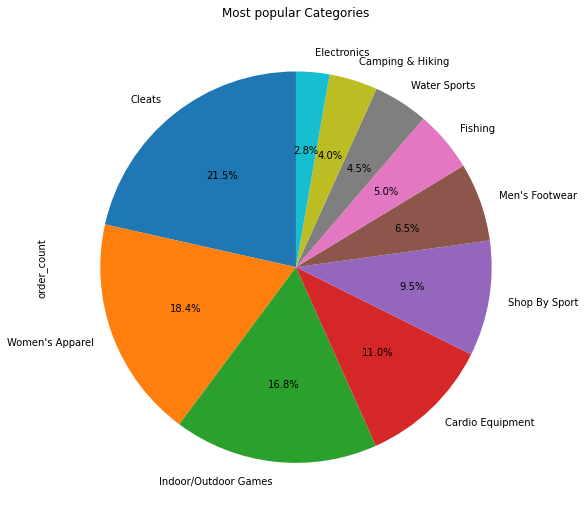

In [0]:
# convert it in pandas dataframe
pop_cat = popular_category_df.toPandas()
# create the pie-chart
pop_cat.plot(kind='pie', y = 'order_count', autopct='%1.1f%%', startangle=90, labels=pop_cat['category_name'], legend=False, title='Most popular Categories', figsize=(9, 9));

In [0]:
orders_by_status = orders_df.groupBy(col("order_status"))\
            .agg(count(col("order_status")).alias("total_status"))
orders_by_status.show()

+---------------+------------+
|   order_status|total_status|
+---------------+------------+
|PENDING_PAYMENT|       15030|
|       COMPLETE|       22899|
|        ON_HOLD|        3798|
| PAYMENT_REVIEW|         729|
|     PROCESSING|        8275|
|         CLOSED|        7555|
|SUSPECTED_FRAUD|        1558|
|        PENDING|        7610|
|       CANCELED|        1428|
+---------------+------------+



In [0]:
display(orders_by_status)

order_status total_status PENDING_PAYMENT 15030 COMPLETE 22899 ON_HOLD 3798 PAYMENT_REVIEW 729 PROCESSING 8275 CLOSED 7555 SUSPECTED_FRAUD 1558 PENDING 7610 CANCELED 1428

Databricks data profile. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
cancelled_orders = orders_df.filter(col('order_status') == 'CANCELED')\
                    .join(order_items_df, col("order_id") == col("order_item_order_id"))\
                    .groupBy("order_id", "order_date", "order_customer_id", "order_status")\
                    .agg(sum('order_item_subtotal').alias('order_total'))\
                    .filter(col('order_total') >= 1000)\
                    .orderBy('order_id')

cancelled_orders.show(10)

+--------+--------------------+-----------------+------------+------------------+
|order_id|          order_date|order_customer_id|order_status|       order_total|
+--------+--------------------+-----------------+------------+------------------+
|     753|2013-07-29 00:00:...|             5094|    CANCELED|           1129.75|
|    2012|2013-08-04 00:00:...|             5165|    CANCELED|1499.8600311279297|
|    2144|2013-08-05 00:00:...|             7932|    CANCELED| 1099.900032043457|
|    2189|2013-08-06 00:00:...|             6829|    CANCELED|1029.9400253295898|
|    2271|2013-08-06 00:00:...|             7603|    CANCELED|1229.9300231933594|
|    2754|2013-08-09 00:00:...|             8946|    CANCELED|1109.9500274658203|
|    3551|2013-08-14 00:00:...|             5363|    CANCELED|1299.8700408935547|
|    4354|2013-08-20 00:00:...|             7268|    CANCELED|1047.9000244140625|
|    4801|2013-08-23 00:00:...|            11630|    CANCELED|1016.9500217437744|
|    5331|2013-0

In [0]:
order_more_than_five = orders_df.filter((col('order_status') != 'CANCELED') & (col('order_status') != 'SUSPECTED_FRAUD'))\
                            .filter((year('order_date') == 2013) & (month('order_date') == 8))\
                            .join(order_items_df, col("order_id") == col("order_item_order_id"), how='inner')\
                            .join(customer_df, col("order_customer_id") == col("customer_id"), how='inner')\
                            .select('customer_id', 'customer_fname', 'customer_lname', 'order_id')\
                            .groupBy('customer_id', 'customer_fname', 'customer_lname')\
                            .agg(count('order_id').alias('order_count'))\
                            .where(col('order_count') > 5)\
                            .orderBy(col('order_count'), col('customer_id'), ascending=[0, 1])


display(order_more_than_five)

customer_id customer_fname customer_lname order_count 791 Mary Smith 15 5047 Shirley Whitehead 14 5477 Mary Smith 14 6088 Mary Brooks 14 9371 Mary Patterson 14 3295 Maria Joseph 13 3536 Mary Tanner 13 4582 Brian House 13 5865 David Middleton 13 8069 Tiffany Mcdaniel 13 9575 John Richards 13 5327 Mary Mcbride 12 5992 Mary Cross 12 9494 Robert Gilmore 12 9657 Roy Williams 12 12362 Mary Smith 12 174 Mary Perez 11 867 Catherine Smith 11 2018 Shirley Bell 11 4914 Mary Curtis 11 6917 Mary Roberts 11 8018 Ruth Shepherd 11 11037 Mary Perry 11 12004 Marie Martinez 11 157 Catherine Chan 10 341 Mary Smith 10 800 Mary Smith 10 1885 Mary Norman 10 2367 Sean Smith 10 3447 Sara Andersen 10 4212 Robert Mendez 10 5197 Brenda Jordan 10 5451 Wayne Torres 10 5541 Johnny Clements 10 5608 James Smith 10 5653 Jean Schultz 10 5660 Mary Maldonado 10 6049 Patricia Smith 10 6278 Mary Brown 10 6356 Mary Smith 10 7143 Mary Burnett 10 7186 Mary Meadows 10 7562 Thomas Hayes 10 7962 Justin Smith 10 8010 Kathy Smith 10 8653 Amanda Smith 10 8769 Mary Cantrell 10 9107 Mark Nunez 10 10077 Judith Smith 10 10289 Virginia Ford 10 10538 Evelyn Gomez 10 10829 Anthony Smith 10 11065 Aaron Smith 10 11118 Mary Smith 10 11189 Mary Hammond 10 11544 Diane Perez 10 11667 Mary Brooks 10 11767 Joshua Huynh 10 245 Deborah Smith 9 422 Deborah Moore 9 518 Elizabeth Smith 9 1373 Mary Smith 9 1905 Mary Hart 9 2404 Mary Keller 9 2467 Keith Smith 9 2609 Mary Smith 9 2811 Thomas Smith 9 2826 Lisa Wallace 9 3202 Emma Wilson 9 3323 Megan Meyers 9 3550 Mary Garner 9 3639 Danielle Edwards 9 3664 Mary Smith 9 3880 Mary Garcia 9 4561 Scott Stone 9 4795 Mary Smith 9 5024 Thomas Klein 9 5218 Timothy George 9 5297 Mary Smith 9 5548 Michael Crawford 9 5626 Frank Morgan 9 5682 Mary Proctor 9 6397 Mary Carr 9 6592 Tyler Austin 9 6649 Mary Smith 9 6875 Mary Mcdowell 9 7084 Jennifer Smith 9 7231 Jack Smith 9 7391 Mary Garrett 9 7670 Anna Smith 9 7717 Terry Smith 9 7789 Mary Sullivan 9 8012 Gregory Smith 9 8637 Mary Smith 9 8757 Tyler Gutierrez 9 8981 Mary Bennett 9 9589 Jacqueline Arroyo 9 9692 Carolyn Price 9 9789 Daniel Valdez 9 9919 Mary Daniel 9 10688 Pamela Rivers 9 10735 Albert Valdez 9 11100 Barbara Tucker 9 11605 Cynthia Smith 9 11656 Mary Wyatt 9 11761 Lauren Coleman 9 11918 Steven Humphrey 9 12285 Patrick Mcgee 9 12371 Mary Velez 9 250 Julie Smith 8 444 Walter Lambert 8 687 Ronald Harrison 8 743 Cynthia Smith 8 1160 Mary Randolph 8 1363 Kathy Rios 8 1480 Jacob Ayers 8 1806 Roger Smith 8 1840 Jerry Smith 8 1932 Shirley Perez 8 1977 Sara Smith 8 2113 David Smith 8 2195 Walter Smith 8 2690 Mary Gibson 8 2909 Sarah Snyder 8 3040 Kathy Brown 8 3180 Raymond Smith 8 3303 Mary Robinson 8 3468 Mary Romero 8 3763 Mary Martinez 8 3950 John Duffy 8 3978 Barbara Simmons 8 4008 Diana Smith 8 4066 Diana Cordova 8 4200 Ralph Campbell 8 4471 Daniel Green 8 4539 Jacqueline James 8 4799 Paul Jensen 8 4876 Harry Smith 8 4926 Mary Smith 8 5280 Mary Day 8 5367 Mary Mccormick 8 5533 Mary Harrison 8 5549 Kathryn Smith 8 5570 Mary Smith 8 5648 Joshua Smith 8 5741 Mary Spencer 8 5848 Tammy Sloan 8 5953 Mary Sparks 8 6255 Joshua Smith 8 6285 Mary Garcia 8 6418 Olivia Owens 8 6500 Joyce Leblanc 8 6626 Mary Franklin 8 6635 Bryan Esparza 8 6845 Mary Smith 8 7150 Mary Smith 8 7205 Maria Jordan 8 7238 Mary Smith 8 7593 Roger Bowman 8 7684 Evelyn Harper 8 7693 Mary Walsh 8 8666 Mary Smith 8 9045 Christopher Townsend 8 9235 Mary Rodriguez 8 9338 James Davis 8 9377 Carol Leach 8 9515 Victoria Smith 8 9685 Mary Kennedy 8 9722 Carolyn Anderson 8 9776 Diane Davis 8 9825 Sandra Johnson 8 9879 Linda Ibarra 8 9897 Marilyn Smith 8 10076 Mary Davis 8 10247 Mary Smith 8 10649 Helen Gonzalez 8 11043 John Watson 8 11583 Mary Smith 8 11697 Jessica Thomas 8 11833 Mary Weaver 8 12024 Mary Smith 8 12116 Mary Shea 8 12284 Mary Smith 8 12352 Sean Smith 8 180 Juan Smith 7 202 Sharon Smith 7 478 Mary Porter 7 502 Jennifer May 7 549 Mary Smith 7 550 Betty Chavez 7 703 Joan Kelly 7 744 Gary Hodges 7 866 James Davies 7 949 Mary Sawyer 7 965 Se